# 1.4.9 Contours

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
im = cv2.imread('puma.png')
img = im.copy()
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(imgray,127,255,0)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [3]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [4]:
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

(Text(0.5,1,'Threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

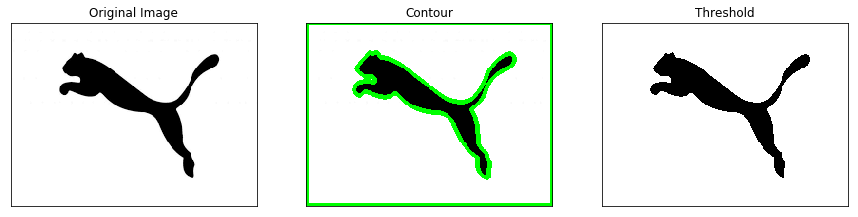

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(131),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Contour'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])

In [6]:
len(contours)

2

In [7]:
contours[0]

array([[[  0,   0]],

       [[  0, 193]],

       [[259, 193]],

       [[259,   0]]], dtype=int32)

## Moments

In [8]:
cnt = contours[1]
M = cv2.moments(cnt)
print (M)

{'m00': 5153.5, 'm10': 669546.6666666666, 'm01': 407182.6666666666, 'm20': 97667100.75, 'm11': 56542666.95833333, 'm02': 36559071.75, 'm30': 15488246005.900002, 'm21': 8595572471.083334, 'm12': 5433172328.383333, 'm03': 3684983583.5, 'mu20': 10679085.062710896, 'mu11': 3641183.075319633, 'mu02': 4387203.304520667, 'mu30': 24391661.525161743, 'mu21': -67323523.98674929, 'mu12': 108003434.33067715, 'mu03': 103144715.25316334, 'nu20': 0.4020957521038586, 'nu11': 0.1371001577963669, 'nu02': 0.16518978938781473, 'nu30': 0.012793391312381356, 'nu21': -0.035311091292509436, 'nu12': 0.05664764563283571, 'nu03': 0.054099254479922865}


In [9]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [10]:
(w, h, c) = img.shape

In [11]:
img = np.zeros(im.shape, np.uint8)
img = cv2.circle(img,(cx,cy),3,(255,255,0),2)
img = cv2.drawContours(img, contours[1], -1, (0,255,0), 3)

(Text(0.5,1,'Contour'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

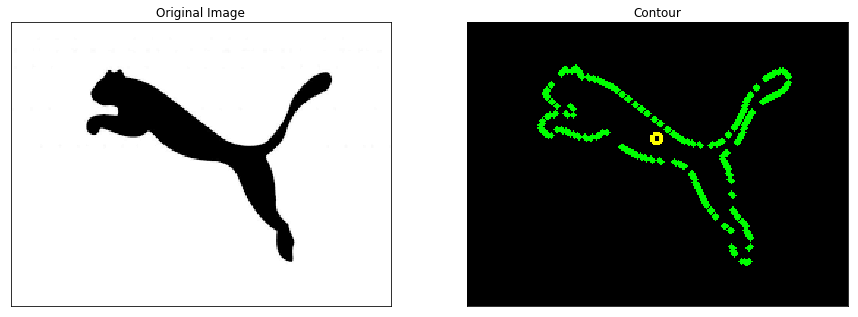

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Contour'), plt.xticks([]), plt.yticks([])

## Contour Area

In [17]:
area = cv2.contourArea(cnt)

## Contour Perimeter

In [18]:
perimeter = cv2.arcLength(cnt,True)

## Contour Approximation

In [26]:
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [27]:
img2 = np.zeros(im.shape,np.uint8)
img2 = cv2.drawContours(img2, approx, -1, (0,255,0), 3)

(Text(0.5,1,'Contour Approximation'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

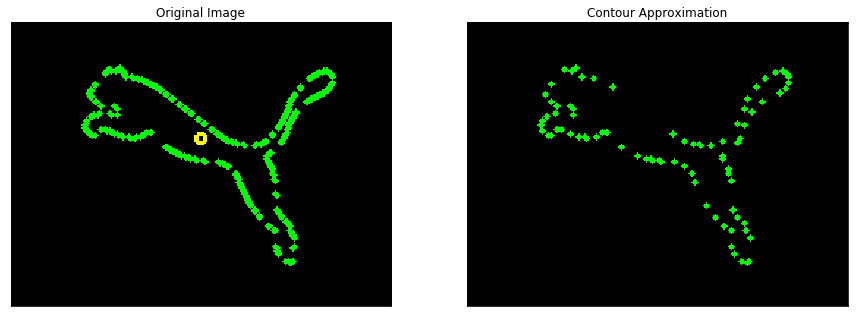

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Contour Approximation'), plt.xticks([]), plt.yticks([])

In [22]:
approx

array([[[ 66,  32]],

       [[218,  35]],

       [[191, 164]]], dtype=int32)

## Convex Hull

In [30]:
hull = cv2.convexHull(cnt)

In [42]:
#img3 = np.zeros(im.shape,np.uint8)
img = cv2.drawContours(img, [hull], -1, (255,255,0), 3)

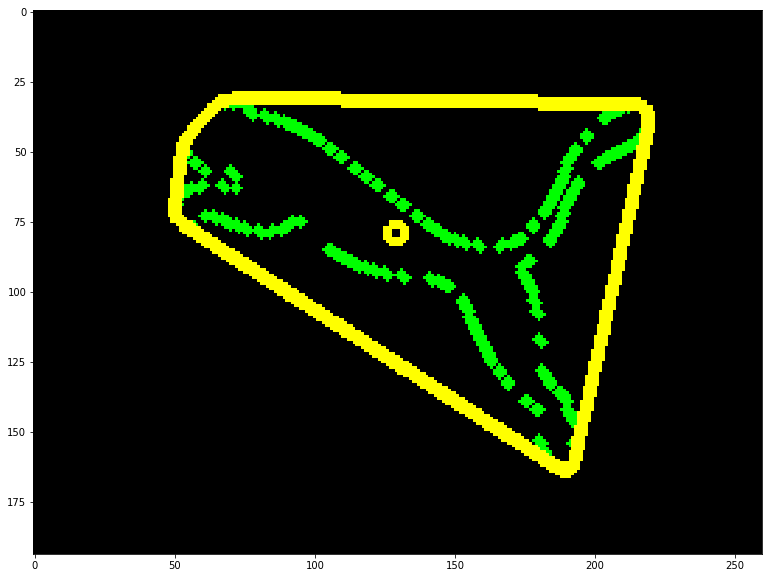

In [43]:
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

In [15]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,255),2)

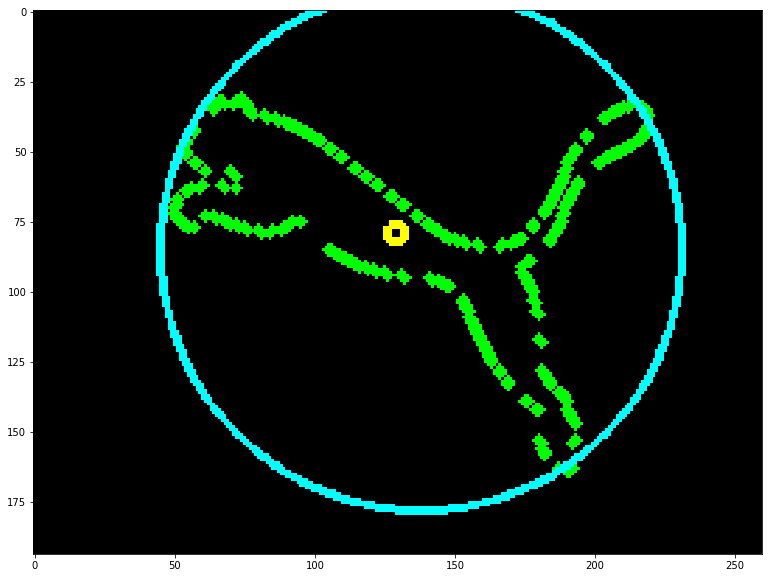

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

In [13]:
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,255),2)

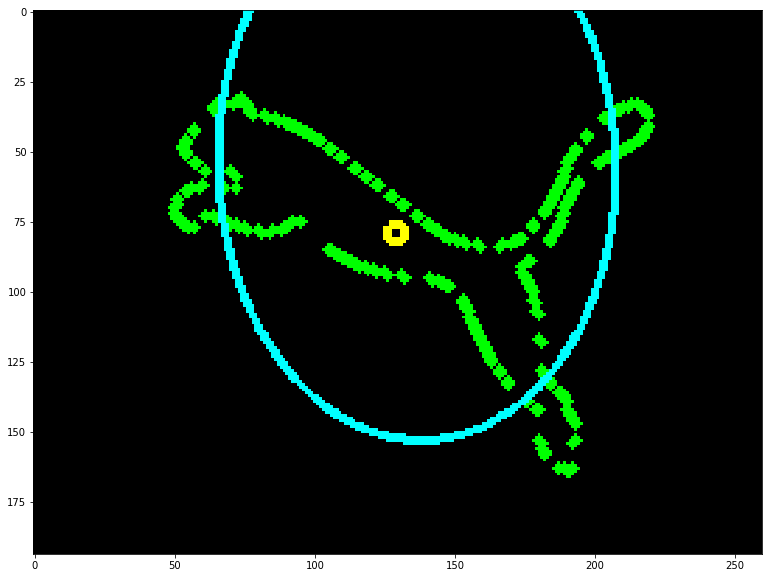

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()